# LSTM for State of a Battery

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [2]:
# Generate sythentic battery data
def generate_battery_data(num_samples=1000, sequence_length=10):
    data = np.random.rand(num_samples, sequence_length)
    return data

In [3]:
# Generate labels for data
def generate_labels(data):
    labels = np.mean(data, axis=1)
    return labels

In [4]:
# Create LSTM model
def create_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(50, input_shape=input_shape, return_sequences=False))
    model.add(Dense(1))
    model.compile(optimizer="adam", loss="mse")
    return model

In [5]:
# Let's go
data = generate_battery_data()
labels = generate_labels(data)

In [6]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [7]:
# Reshape data for LSTM
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [9]:
# Create and train model
model = create_lstm_model(input_shape=(X_train.shape[1], X_train.shape[2]))
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=True)

Epoch 1/10


/Users/jorocca/tf_env/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2025-03-15 18:22:39.037827: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2283 - val_loss: 0.0109
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0085 - val_loss: 0.0028
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0024 - val_loss: 0.0013
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0014 - val_loss: 0.0012
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0014 - val_loss: 0.0011
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0013 - val_loss: 9.7261e-04
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0011 - val_loss: 8.5195e-04
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 9.5561e-04 - val_loss: 7.5514e-04
Epoch 9/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 8.0546e-04 - val_loss: 6.8419e-04
Epoch 10/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 7.3409e-04 - val_loss: 5.8774e-04


In [ ]:
# Evaluate model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
MSE: 0.0005877429534660035


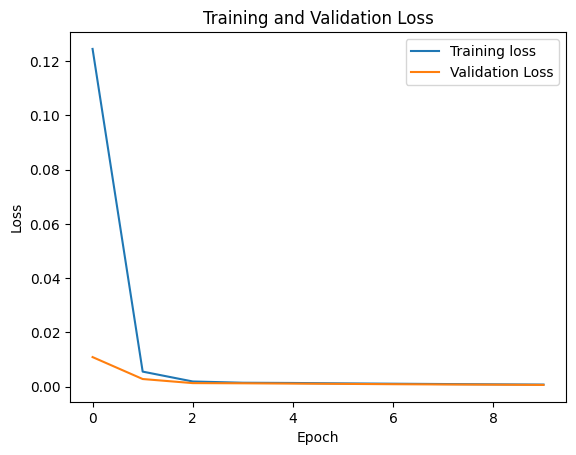

In [11]:
# Plot training and validation tools
plt.plot(history.history["loss"], label="Training loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()